<a href="https://colab.research.google.com/github/holeprateek47/Machine-learning-project-/blob/main/Sound_Detective.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Found 40 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.2781 - loss: 1.6063 - val_accuracy: 0.6000 - val_loss: 1.3526
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4354 - loss: 1.4111 - val_accuracy: 0.6000 - val_loss: 0.9986
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2344 - loss: 1.2751 - val_accuracy: 0.5000 - val_loss: 0.8958
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6313 - loss: 0.8850 - val_accuracy: 0.7000 - val_loss: 0.7585
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 779ms/step - accuracy: 0.5271 - loss: 1.0272 - val_accuracy: 0.6000 - val_loss: 0.7552
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 712ms/step - accuracy: 0.7167 - loss: 0.8166 - val_accuracy: 0.8000 - val_loss: 0.5197
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 645ms/step - accuracy: 0.7375 - loss: 0.6227 - val_accuracy: 1.0000 - val_loss: 0.4121
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 620ms/step - accuracy: 0.7906 - loss: 0.5646 - val_accuracy: 0.9000 - val_loss: 0.3554
Epoc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


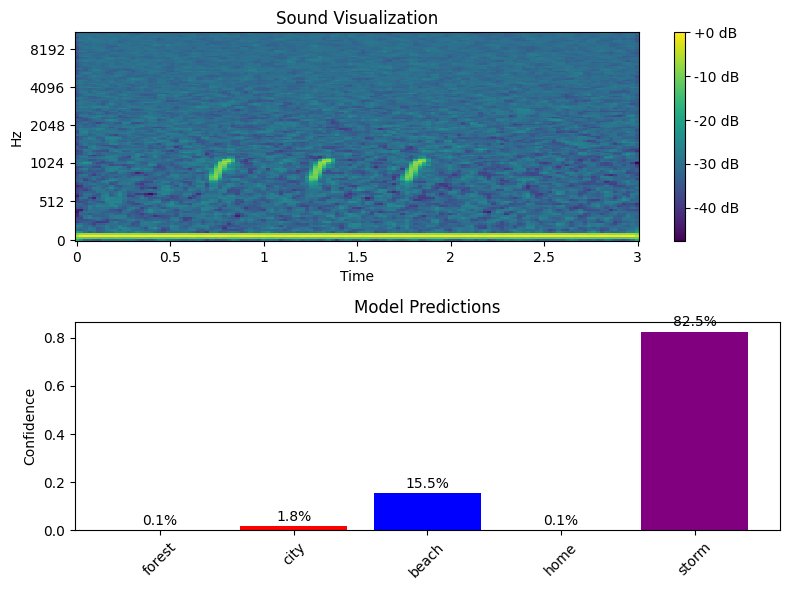

Model thinks: storm (82.5% sure)
Actual sound: city

Play the game:


Button(description='Start Game', layout=Layout(height='60px', width='200px'), style=ButtonStyle())

Output()


Create custom sounds:


Output()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import soundfile as sf
from IPython.display import Audio, display, clear_output
import ipywidgets as widgets
import tensorflow as tf
import os
import random

def create_sound_library():
    os.makedirs('sounds', exist_ok=True)
    categories = ['forest', 'city', 'beach', 'home', 'storm']

    for category in categories:
        os.makedirs(f'sounds/{category}', exist_ok=True)

    return categories

categories = create_sound_library()

def generate_nature_sound():
    duration = 3
    sr = 22050
    t = np.linspace(0, duration, int(sr * duration))

    bird_chirps = np.zeros_like(t)
    for _ in range(20):
        start = random.randint(0, len(t)-1000)
        freq = 1000 + random.random() * 2000
        bird_chirps[start:start+500] += 0.3 * np.sin(2 * np.pi * freq * t[start:start+500])

    wind = 0.1 * np.random.normal(0, 1, len(t))
    sound = bird_chirps + wind
    return sound / np.max(np.abs(sound))

def generate_city_sound():
    duration = 3
    sr = 22050
    t = np.linspace(0, duration, int(sr * duration))

    engine = 0.5 * np.sin(2 * np.pi * 80 * t)

    honks = np.zeros_like(t)
    for _ in range(3):
        start = random.randint(0, len(t)-2000)
        honk_freq = 800 + 200 * np.sin(2 * np.pi * 2 * t[:2000])
        honks[start:start+2000] += 0.4 * np.sin(2 * np.pi * honk_freq * t[:2000])

    traffic = 0.2 * np.random.normal(0, 1, len(t))
    sound = engine + honks + traffic
    return sound / np.max(np.abs(sound))

def generate_beach_sound():
    duration = 3
    sr = 22050
    t = np.linspace(0, duration, int(sr * duration))

    waves = np.zeros_like(t)
    for i in range(5):
        start = i * sr * 0.6
        end = start + sr * 0.4
        wave = 0.6 * np.sin(2 * np.pi * (100 + 50 * np.sin(2 * np.pi * 0.5 * t[:int(end-start)])) * t[:int(end-start)])
        waves[int(start):int(end)] += wave

    seagull = np.zeros_like(t)
    if random.random() > 0.7:
        start = random.randint(sr, 2*sr)
        gull_sound = 0.3 * np.sin(2 * np.pi * (800 + 100 * np.sin(2 * np.pi * 5 * t[:1000])) * t[:1000])
        seagull[start:start+1000] = gull_sound

    sound = waves + seagull
    return sound / np.max(np.abs(sound))

def generate_home_sound():
    duration = 3
    sr = 22050
    t = np.linspace(0, duration, int(sr * duration))

    fridge = 0.3 * np.sin(2 * np.pi * 120 * t)

    footsteps = np.zeros_like(t)
    for step in range(8):
        start = step * sr * 0.4
        footstep = 0.4 * (np.random.random(500) - 0.5) * np.hanning(500)
        if start + 500 < len(footsteps):
            footsteps[int(start):int(start)+500] += footstep

    tv = 0.2 * np.sin(2 * np.pi * 200 * t) * np.sin(2 * np.pi * 2 * t)
    sound = fridge + footsteps + tv
    return sound / np.max(np.abs(sound))

def generate_storm_sound():
    duration = 3
    sr = 22050
    t = np.linspace(0, duration, int(sr * duration))

    rain = 0.4 * np.random.normal(0, 1, len(t))

    thunder = np.zeros_like(t)
    if random.random() > 0.5:
        start = random.randint(sr, 2*sr)
        thunder_freq = 50 * np.exp(-2 * t[:2000])
        thunder[start:start+2000] = 0.8 * np.sin(2 * np.pi * thunder_freq * t[:2000]) * np.hanning(2000)

    wind = 0.3 * np.sin(2 * np.pi * (100 + 20 * np.sin(2 * np.pi * 0.3 * t)) * t)
    sound = rain + thunder + wind
    return sound / np.max(np.abs(sound))

sound_generators = [generate_nature_sound, generate_city_sound, generate_beach_sound, generate_home_sound, generate_storm_sound]

for category_idx, category in enumerate(categories):
    for i in range(10):
        sound = sound_generators[category_idx]()
        filename = f'sounds/{category}/sound_{i}.wav'
        sf.write(filename, sound, 22050)

def create_sound_images():
    os.makedirs('sound_images', exist_ok=True)
    for category in categories:
        os.makedirs(f'sound_images/{category}', exist_ok=True)

    for category in categories:
        sound_files = os.listdir(f'sounds/{category}')

        for sound_file in sound_files:
            y, sr = librosa.load(f'sounds/{category}/{sound_file}')

            plt.figure(figsize=(4, 4))
            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
            S_db = librosa.power_to_db(S, ref=np.max)
            librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
            plt.axis('off')
            plt.tight_layout(pad=0)

            image_path = f'sound_images/{category}/{sound_file.replace(".wav", ".png")}'
            plt.savefig(image_path, bbox_inches='tight', pad_inches=0, dpi=80)
            plt.close()

create_sound_images()

def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(len(categories), activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

model = build_model()

def train_model():
    from tensorflow.keras.preprocessing.image import ImageDataGenerator

    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = train_datagen.flow_from_directory(
        'sound_images',
        target_size=(128, 128),
        batch_size=16,
        class_mode='sparse',
        subset='training'
    )

    validation_generator = train_datagen.flow_from_directory(
        'sound_images',
        target_size=(128, 128),
        batch_size=16,
        class_mode='sparse',
        subset='validation'
    )

    history = model.fit(
        train_generator,
        epochs=15,
        validation_data=validation_generator,
        verbose=1
    )

    return history

history = train_model()

def test_sound():
    test_category = random.choice(categories)

    sound_generators = {
        'forest': generate_nature_sound,
        'city': generate_city_sound,
        'beach': generate_beach_sound,
        'home': generate_home_sound,
        'storm': generate_storm_sound
    }

    test_sound = sound_generators[test_category]()

    display(Audio(test_sound, rate=22050))

    sf.write('test_sound.wav', test_sound, 22050)

    y, sr = librosa.load('test_sound.wav')
    plt.figure(figsize=(8, 6))

    plt.subplot(2, 1, 1)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_db = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Sound Visualization')

    plt.subplot(2, 1, 2)

    temp_img_path = 'temp_test.png'
    plt.figure(figsize=(4, 4))
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig(temp_img_path, bbox_inches='tight', pad_inches=0, dpi=80)
    plt.close()

    img = tf.keras.preprocessing.image.load_img(temp_img_path, target_size=(128, 128))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    predictions = model.predict(img_array)[0]

    colors = ['green', 'red', 'blue', 'orange', 'purple']
    bars = plt.bar(categories, predictions, color=colors[:len(categories)])
    plt.title('Model Predictions')
    plt.ylabel('Confidence')
    plt.xticks(rotation=45)

    for i, (bar, pred) in enumerate(zip(bars, predictions)):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{pred*100:.1f}%', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    predicted_idx = np.argmax(predictions)
    confidence = predictions[predicted_idx] * 100

    print(f"Model thinks: {categories[predicted_idx]} ({confidence:.1f}% sure)")
    print(f"Actual sound: {test_category}")

def play_game():
    guess_buttons = []
    for category in categories:
        button = widgets.Button(
            description=category.upper(),
            layout=widgets.Layout(width='100px', height='50px')
        )
        guess_buttons.append(button)

    buttons_box = widgets.HBox(guess_buttons)
    output = widgets.Output()

    game_state = {
        'score': 0,
        'rounds': 0,
        'current_sound': None
    }

    def play_new_round(b=None):
        with output:
            clear_output()
            game_state['rounds'] += 1

            actual_category = random.choice(categories)
            sound_generators = {
                'forest': generate_nature_sound,
                'city': generate_city_sound,
                'beach': generate_beach_sound,
                'home': generate_home_sound,
                'storm': generate_storm_sound
            }

            game_state['current_sound'] = sound_generators[actual_category]()
            game_state['actual_category'] = actual_category

            display(Audio(game_state['current_sound'], rate=22050))

    def check_guess(button):
        user_guess = button.description.lower()
        actual = game_state['actual_category']

        with output:
            clear_output()

            sf.write('game_sound.wav', game_state['current_sound'], 22050)
            y, sr = librosa.load('game_sound.wav')

            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
            S_db = librosa.power_to_db(S, ref=np.max)

            temp_img_path = 'game_temp.png'
            plt.figure(figsize=(4, 4))
            librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
            plt.axis('off')
            plt.tight_layout(pad=0)
            plt.savefig(temp_img_path, bbox_inches='tight', pad_inches=0, dpi=80)
            plt.close()

            img = tf.keras.preprocessing.image.load_img(temp_img_path, target_size=(128, 128))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0

            ai_predictions = model.predict(img_array)[0]
            ai_guess_idx = np.argmax(ai_predictions)
            ai_guess = categories[ai_guess_idx]
            ai_confidence = ai_predictions[ai_guess_idx] * 100

            print(f"Your guess: {user_guess}")
            print(f"AI's guess: {ai_guess} ({ai_confidence:.1f}% confident)")
            print(f"Actual sound: {actual}")

            user_correct = (user_guess == actual)

            if user_correct:
                game_state['score'] += 1
                print("Correct! +1 point")
            else:
                print("Wrong guess")

            print(f"Your score: {game_state['score']}/{game_state['rounds']}")

            next_button = widgets.Button(description="Next Round",
                                       layout=widgets.Layout(width='150px', height='40px'))
            next_button.on_click(play_new_round)
            display(next_button)

    for button in guess_buttons:
        button.on_click(check_guess)

    start_button = widgets.Button(description="Start Game",
                                layout=widgets.Layout(width='200px', height='60px',
                                                     button_color='lightgreen'))
    start_button.on_click(play_new_round)

    display(start_button)
    display(buttons_box)
    display(output)

def create_custom_sound():
    freq_slider = widgets.FloatSlider(value=440, min=50, max=2000, step=50, description='Frequency:')
    duration_slider = widgets.FloatSlider(value=2, min=0.5, max=5, step=0.5, description='Duration:')
    noise_slider = widgets.FloatSlider(value=0.1, min=0, max=1, step=0.1, description='Noise:')
    wave_type = widgets.Dropdown(options=['sine', 'square', 'sawtooth'], description='Wave Type:')

    create_button = widgets.Button(description="Create Sound")
    output = widgets.Output()

    def create_sound(b):
        with output:
            clear_output()

            duration = duration_slider.value
            sr = 22050
            t = np.linspace(0, duration, int(sr * duration))
            frequency = freq_slider.value

            if wave_type.value == 'sine':
                sound = 0.5 * np.sin(2 * np.pi * frequency * t)
            elif wave_type.value == 'square':
                sound = 0.5 * np.sign(np.sin(2 * np.pi * frequency * t))
            else:
                sound = 0.5 * (2 * (t * frequency - np.floor(0.5 + t * frequency)))

            noise = noise_slider.value * np.random.normal(0, 1, len(t))
            sound += noise
            sound = sound / np.max(np.abs(sound))

            display(Audio(sound, rate=sr))

            sf.write('custom_sound.wav', sound, sr)
            y, sr = librosa.load('custom_sound.wav')

            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
            S_db = librosa.power_to_db(S, ref=np.max)

            temp_img_path = 'custom_temp.png'
            plt.figure(figsize=(4, 4))
            librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
            plt.axis('off')
            plt.tight_layout(pad=0)
            plt.savefig(temp_img_path, bbox_inches='tight', pad_inches=0, dpi=80)
            plt.close()

            img = tf.keras.preprocessing.image.load_img(temp_img_path, target_size=(128, 128))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0

            predictions = model.predict(img_array)[0]

            plt.figure(figsize=(10, 4))

            plt.subplot(1, 2, 1)
            librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', cmap='viridis')
            plt.colorbar()
            plt.title('Sound Visualization')

            plt.subplot(1, 2, 2)
            colors = ['green', 'red', 'blue', 'orange', 'purple']
            bars = plt.bar(categories, predictions, color=colors[:len(categories)])
            plt.title('Model Predictions')
            plt.ylabel('Confidence')
            plt.xticks(rotation=45)

            for i, (bar, pred) in enumerate(zip(bars, predictions)):
                plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                        f'{pred*100:.1f}%', ha='center', va='bottom')

            plt.tight_layout()
            plt.show()

            best_guess_idx = np.argmax(predictions)
            confidence = predictions[best_guess_idx] * 100

            print(f"Model's guess: {categories[best_guess_idx]} ({confidence:.1f}% confidence)")

    create_button.on_click(create_sound)

    controls = widgets.VBox([freq_slider, duration_slider, noise_slider, wave_type, create_button])
    display(controls)
    display(output)

print("Sound Detective is ready!")
print("\nTest the model:")
test_sound()

print("\nPlay the game:")
play_game()

print("\nCreate custom sounds:")
create_custom_sound()